In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import warnings
from statsmodels.tsa.arima.model import ARIMA


def forecast(inputlst,upto):
    data=pd.DataFrame(inputlst)
    stepwise_fit=auto_arima(data,trace=True,suppress_warnings=True)
    param=stepwise_fit.get_params()
    ord=param['order']
    model=ARIMA(data,order=ord)
    model=model.fit()

    start=len(data)
    end=len(data)+upto-1
    pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
    res = pred.astype(int)
    for i in res:
        inputlst.append(i)
    return inputlst

In [15]:
df = pd.read_csv('./Dataset/global_cases.csv')
df.head()

,Date,Cases
0,22/01/20,557
1,23/01/20,657
2,24/01/20,944
3,25/01/20,1437
4,26/01/20,2120


In [16]:
lst = []

In [17]:
for index, row in df.iterrows():
    lst.append(row['Cases'])

In [18]:
len(lst)

1143

In [19]:
res=forecast(lst[:800],343)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=21626.561, Time=0.49 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=21740.351, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=21730.547, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=21709.402, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=21616.587, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=21604.490, Time=0.04 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=21607.851, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=21629.619, Time=0.05 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=21494.043, Time=0.15 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=21544.381, Time=0.28 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=21449.315, Time=0.22 sec
 ARIMA(0,2,4)(0,0,0)[0]             : AIC=21455.535, Time=0.22 sec
 ARIMA(2,2,4)(0,0,0)[0]             : AIC=21434.957, Time=0.52 sec
 ARIMA(3,2,4)(0,0,0)[0]             : AIC=21320.449, Time=0.66 sec
 ARIMA(3,2,3)(0,0,0

/Users/swoyamsiddharth/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/swoyamsiddharth/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [20]:
len(lst)

1143

In [21]:
len(res)

1143

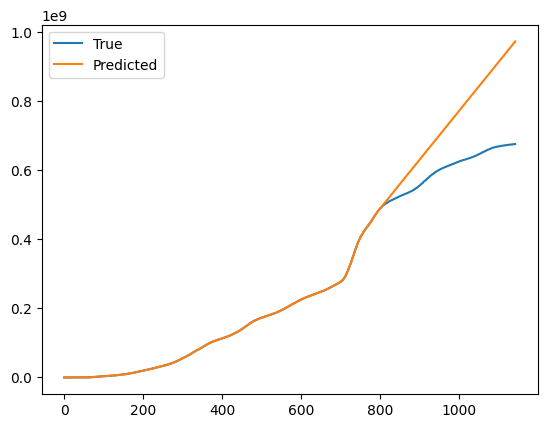

In [22]:
import matplotlib.pyplot as plt

plt.plot(lst, label='True')
plt.plot(res, label='Predicted')
plt.legend()
plt.show()

In [23]:
df.drop(df.columns[0], axis=1, inplace=True)

In [24]:
df.head()

,Cases
0,557
1,657
2,944
3,1437
4,2120


In [25]:
df.to_csv("./Test.csv", index=False)